In [1]:
import numpy
import hmclab
import pandas
import matplotlib.pyplot as plt

In [9]:
tts = pandas.read_csv("./raytomography/traveltimes_ava1_p.csv", header=None)

shot_distances = [42.8]
receiver_depths = tts[0].to_numpy()
arrival_times_observed = tts[1].to_numpy()
nnan = numpy.logical_not(numpy.isnan(arrival_times_observed))

receiver_depths = receiver_depths[nnan]
arrival_times_observed = arrival_times_observed[nnan]

n_layers = 40
layer_interfaces = numpy.linspace(0, receiver_depths.max(), n_layers) + 20

physics = hmclab.Distributions.LayeredRayTracing2D(
    layer_interfaces,
    shot_distances,
    receiver_depths,
    arrival_times_observed,
    tolerance=1.0,
)


v, _T0 = physics.fit_homogeneous()

Approximate medium velocity:	3809.31m/s
Approximate origin time:	0.10 s


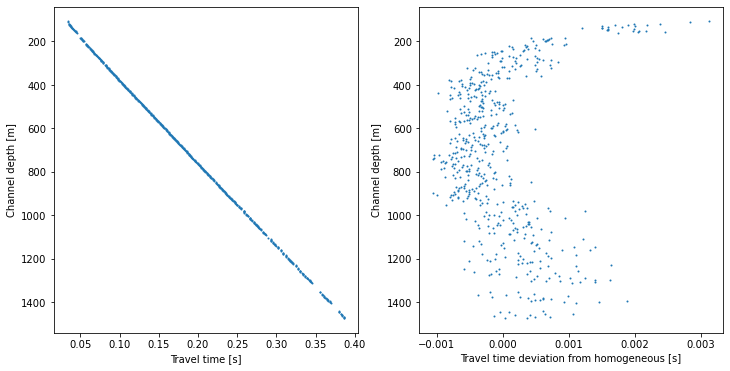

In [10]:
physics.plot_data()

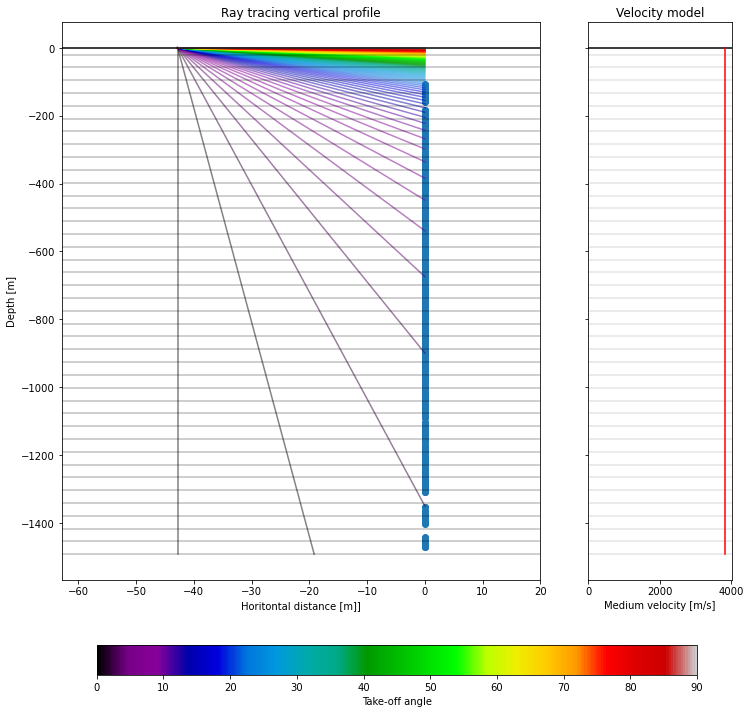

In [11]:
angles = numpy.linspace(0, 89.9, 100)

homogeneous_model = physics.homogeneous_model()

_ = physics.plot_rays(
    angles,
    homogeneous_model,
    keep_upgoing=True,
    domain_x_axis_margin=20,
    force_aspect=False,
)

In [12]:
physics.parallel = True
physics.misfit(homogeneous_model)
gradient = physics.gradient(homogeneous_model)

In [13]:
from scipy.optimize import minimize


def f(m):
    return physics.misfit(m)


def df(m):
    return physics.gradient(m).flatten()


res = minimize(
    f,
    homogeneous_model,
    method="BFGS",
    jac=df,
    options={
        "gtol": 1e-6,
        "disp": True,
        "maxiter": 10,
        "return_all": True,
    },
)

         Current function value: 421.278105
         Iterations: 10
         Function evaluations: 24
         Gradient evaluations: 24


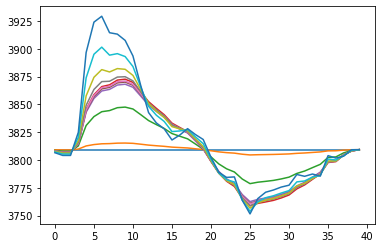

In [23]:
_ = plt.plot(numpy.asarray(res.allvecs).T)

In [ ]:
plt.plot(res.x)